### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.


# Problem Definition:
## Using scikit learn in boston data to predict 'Price' based on other dependent variable


CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.    
INDUS    proportion of non-retail business acres per town  
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)      
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940   
DIS      weighted distances to five Boston employment centres    
RAD      index of accessibility to radial highways     
TAX      full-value property-tax rate per 10,000     
PTRATIO  pupil-teacher ratio by town     
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town      
LSTAT    lower status of the population
MEDV     Median value of owner-occupied homes in 1000


### Features 
CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

### Target Variable
MEDV


### Load Libraries

In [249]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn import metrics



### Load dataset

In [219]:
boston = load_boston()
bos = pd.DataFrame(data = boston.data, columns = boston.feature_names)
bos['MEDV'] = boston.target

### Summarize data

In [82]:
print(bos.shape)

(506, 14)


In [83]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [64]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [30]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Summary Statistics


In [145]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.593997,11.386139,11.122990,0.067327,0.554372,6.279693,68.546535,3.798786,9.520792,407.726733,18.452079,356.678238,2.372361,22.534059
std,8.605305,23.340080,6.860133,0.250835,0.115764,0.694457,28.169533,2.106112,8.692045,168.312294,2.165696,91.385341,0.600665,9.206180
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,0.548121,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100700,4.000000,279.000000,17.400000,375.520000,1.947338,17.000000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208000,77.300000,3.215700,5.000000,330.000000,19.000000,391.450000,2.431857,21.200000
75%,3.673670,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.211900,24.000000,666.000000,20.200000,396.230000,2.830858,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,3.636796,50.000000


#### Observations:
 We have data from 506 neighborhoods/townships in the Boston area.

1. The average per capita crime rate is 3.59
2. The average number of rooms per dweling is 6.28, but ranges from 3.5 to 8.
3. The average nitic oxide concentration (in parts per 10 million) is .55. The neighborhood with the least NOX has .38, the one with the most has .87.
4. The average Pupil-Teacher ratio is 18 students to one teacher.
5. The average weighted distance to the five major Boston employment centers is 3.79.
6. The average percent of lower status population is 12.65%, but ranges from 7.14% to a more impovrished 37.97%
7. The columns ZN, CHAS have 25th and 50th percentile as 0. These values will not useful in regression.

## Exploratory Data Analysis

### 1. Finding Missing Values

In [31]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Observation: 
There are no missing values in the dataset

### 2. Finding Outliers

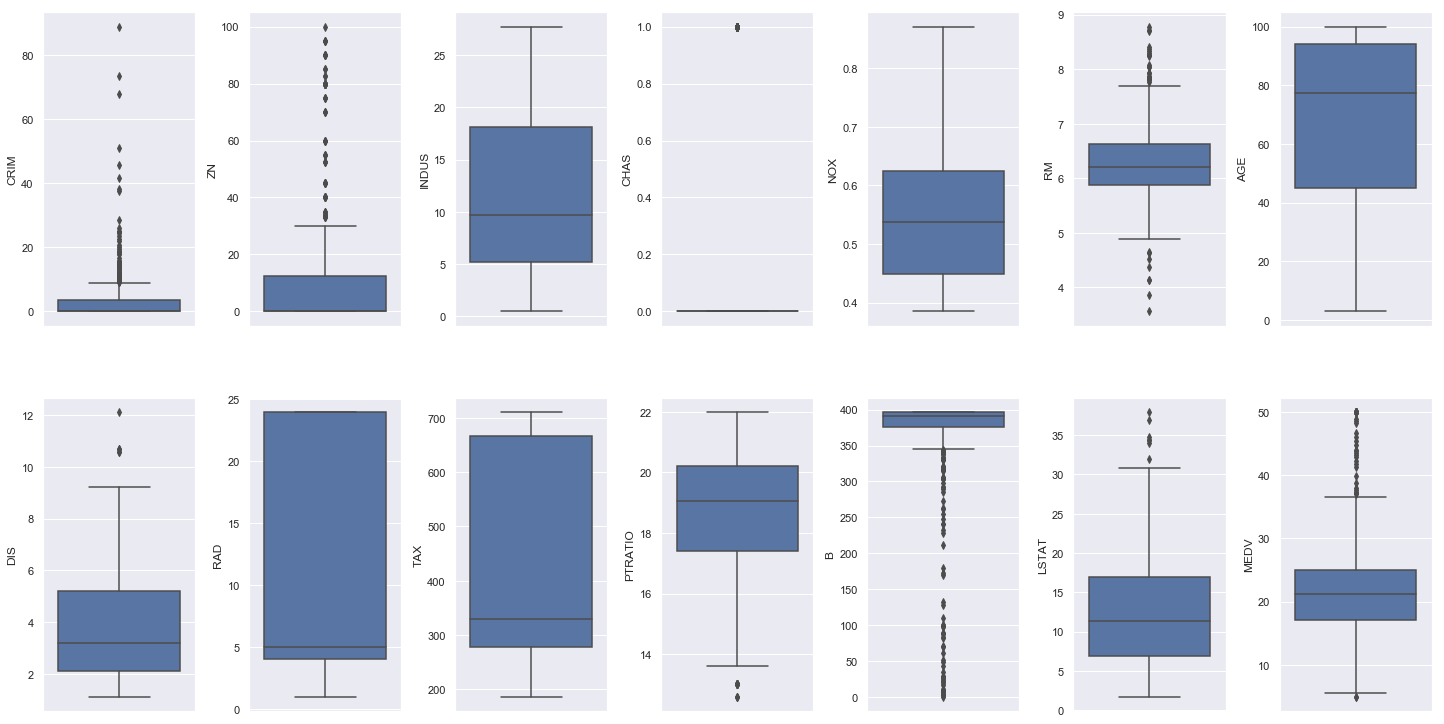

In [220]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.boxplot(y=k, data=bos, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Observation: 
Columns CRIM, ZN, RM, LSTAT have outliers.

#### Finding Outlier Percentage of every column

In [221]:
for k, v in bos.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(bos)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
        


Column CRIM outliers = 12.85%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


#### Removing Outliers of target variable (MEDV)

In [222]:
bos = bos[~(bos['MEDV'] >= 50.0)]
print(np.shape(bos))


(490, 14)


### 3. Feature and Target variable Relationship

C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


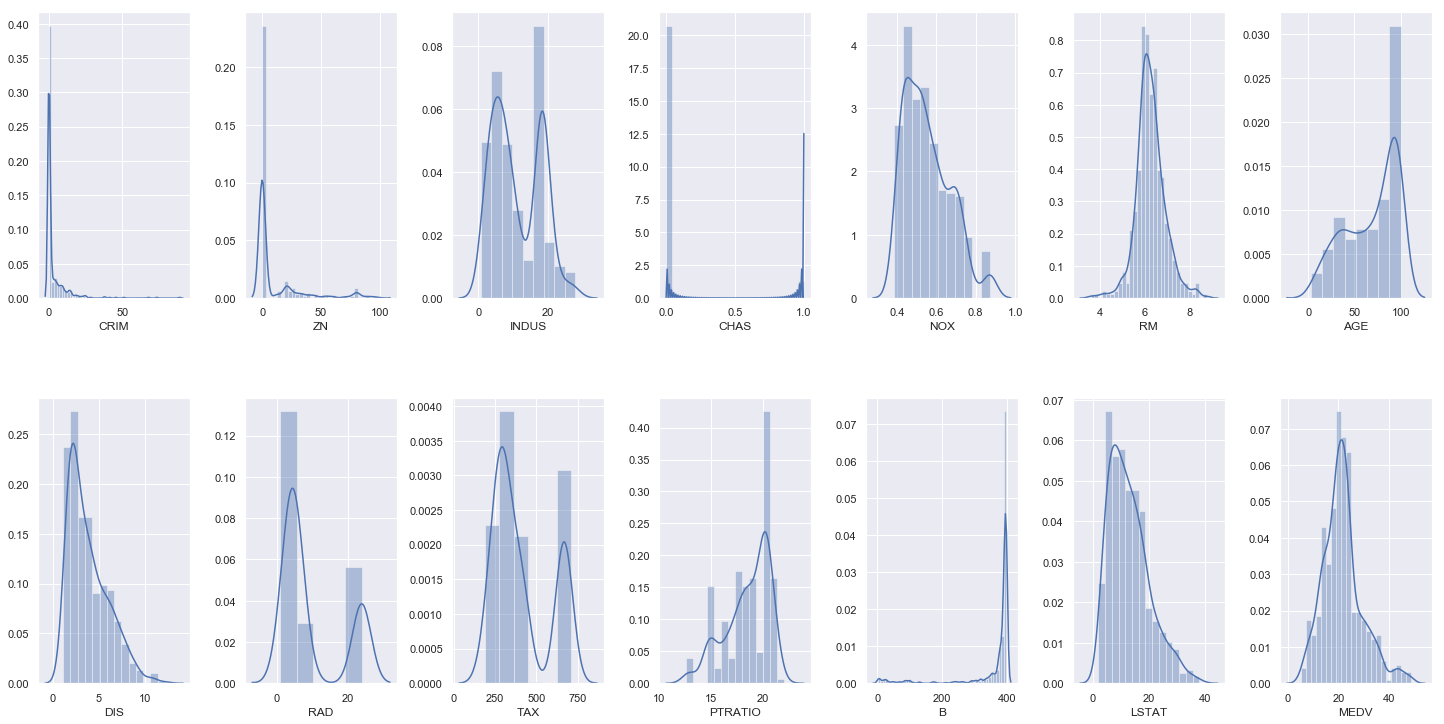

In [223]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Observation:
1. columns CRIM, ZN, B has highly skewed distributions. 
2. MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data 

### 4. Checking correlation between features

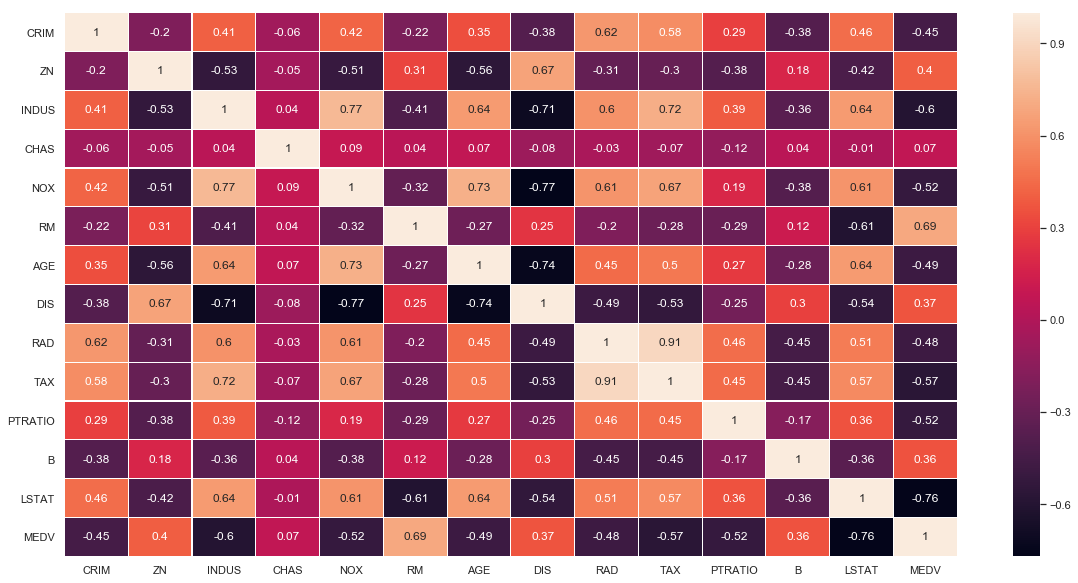

In [224]:
correlation_matrix = bos.corr().round(2)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data=correlation_matrix, annot= True,linewidths=.10, ax=ax)

### From the correlation heat map, the following points can be observed.

Considering values greater than 0.5 and lesser than -0.5.

1) RV - has a strong positive correlation with MEDV (0.7).

2) LSTAT - has a strong negative correlation with MEDV (-0.74).

3) PTRATIO - has negative correlation with MEDV(-0.51).

4) INDUS - has negative correlation with MEDV(-0.61)

5) TAX - has negative correlation with MEDV(-0.62)

6) NOX - has negative correlation with MEDV(-0.57)

7) AGE - has negative correlation with MEDV(-0.52)


### Removing Multicollinearity:
 Based on Observations :
 
1) DIS and AGE are found to have strong negative correlated with -0.75.

2) RAD and TAX are found to  have strong positive correlation with 0.91.

Since DIS is correlated with multiple variables, we can drop DIS column.

RAD has low correlation value, so it can be dropped.

### 5. Checking linearity:

C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


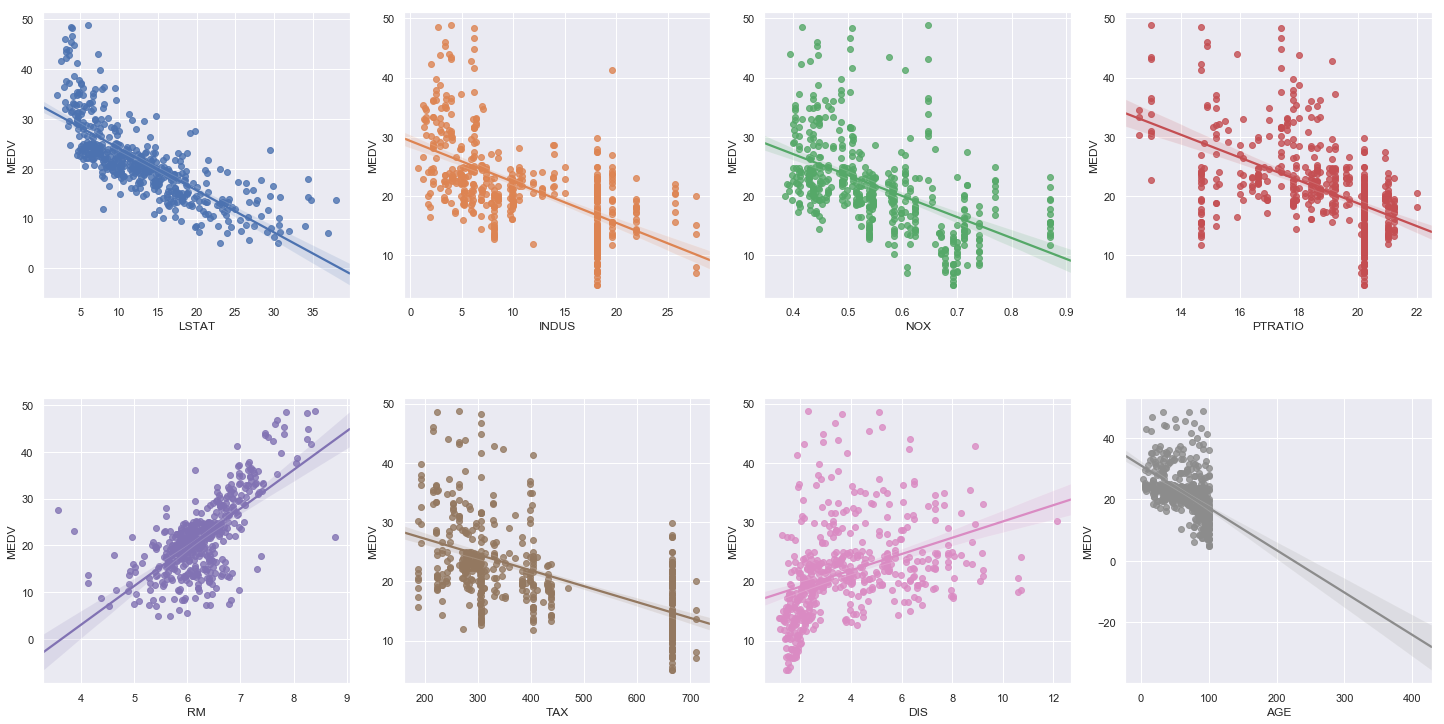

In [225]:
sel_column = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = bos.loc[:,sel_column]
y = bos['MEDV']
x = pd.DataFrame(data=X, columns=sel_column)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(sel_column):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation:
1) The MEDV value increases as RM value increases - positive relationship. 

2) Other features have negative correlation - MEDV decreases as the feature variables increase.



### 6. Removing skewness

In [226]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

## Building linear regression Model

In [227]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Feature Scaling 

In [228]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#### Fitting the model

In [229]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting Price for test data

In [230]:
y_pred = regressor.predict(X_test)


Text(0,0.5,'Price(MEDV)')

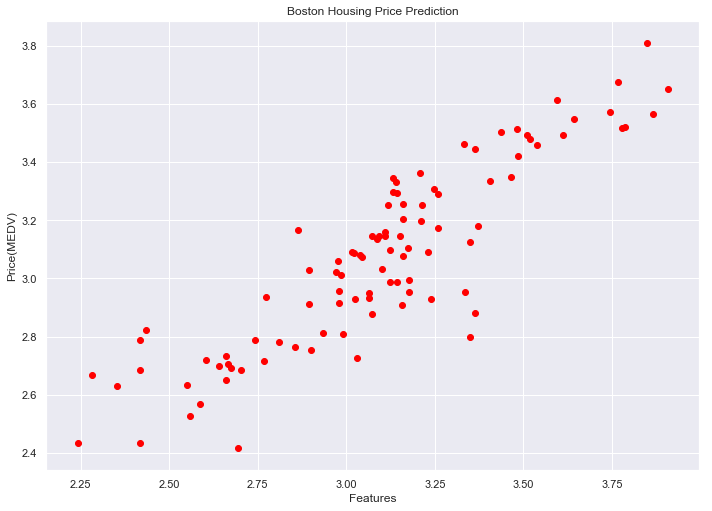

In [232]:
plt.scatter(y_test, y_pred, color='red')
plt.title('Boston Housing Price Prediction')
plt.xlabel('Features')
plt.ylabel('Price(MEDV)')

### Accuracy

#### Accuracy for training data

In [233]:
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print('Root mean Square:%f \n R-squared value:%f'%(rmse,r2))

Root mean Square:0.182274 
 R-squared value:0.741714


#### Accuracy for testing data

In [234]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('Root mean Square:%f \n R-squared value:%f'%(rmse,r2))

Root mean Square:0.171503 
 R-squared value:0.782048


#### Coefficient and Intercept 

In [255]:
print('Coefficients for feature variables')
print(list(zip(x.columns,regressor.coef_)))
print('Intercept:%f'%regressor.intercept_)

Coefficients for feature variables
[('LSTAT', -0.21505610448960918), ('INDUS', 0.013783223798133978), ('NOX', -0.057776886641944955), ('PTRATIO', -0.05957147304523248), ('RM', 0.043341871283286384), ('TAX', -0.06689810937293778), ('DIS', -0.038824211399658304), ('AGE', 0.02133691854158496)]
Intercept:3.049520


In [253]:
print('Mean absolute error:%f'%metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:%f'%metrics.mean_squared_error(y_test, y_pred))


Mean absolute error:0.129434
Mean squared error:0.029413
0.17150319242476272


### CONCLUSION:

Features to predict Prices of houses(MEDV): 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'.

Accuracy obtained with training data - 74.17%

Accuracy obtained with test data - 78.20%

Mean absolute error - 0.129

Mean squared error - 0.02

